In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 한글 폰트를 사용하기 위한 코드
import platform
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux':
    plt.rc('font', family='NanumGothic')

In [2]:
# data 가져오기
df = pd.read_csv('./t_data.csv')
# 결측값 확인
print(df.isnull().sum())
df

년도         0
날짜         0
승패         0
상대         0
AVG_K      0
OPS_K      0
LI_K       0
WPA_K      0
HR/AB_K    0
SO/AB_K    0
ERA_K      0
WHIP_K     0
LI_K.1     0
WPA_K.1    0
SO/IP_K    0
AVG_R      0
OPS_R      0
LI_R       0
WPA_R      0
HR/AB_R    0
SO/AB_R    0
ERA_R      0
WHIP_R     0
LI_R.1     0
WPA_R.1    0
SO/IP_R    0
dtype: int64


,년도,날짜,승패,상대,AVG_K,OPS_K,LI_K,WPA_K,HR/AB_K,SO/AB_K,...,OPS_R,LI_R,WPA_R,HR/AB_R,SO/AB_R,ERA_R,WHIP_R,LI_R.1,WPA_R.1,SO/IP_R
0,2018,3월 24일,0,kt,0.333,0.779,1.75,-0.225,0.000,0.222,...,0.883,1.01,0.275,0.081,0.243,4.00,1.56,1.7,0.225,0.889
1,2018,3월 25일,1,kt,0.410,1.224,0.24,0.395,0.103,0.205,...,0.545,0.23,-0.105,0.030,0.242,15.75,2.38,0.2,-0.395,1.000
2,2018,3월 27일,1,삼성,0.389,1.494,0.30,0.282,0.167,0.278,...,0.454,0.32,-0.218,0.000,0.156,19.13,2.88,0.3,-0.282,1.250
3,2018,3월 28일,0,삼성,0.156,0.479,0.89,-0.386,0.000,0.156,...,0.826,0.60,0.114,0.026,0.179,0.00,0.78,0.9,0.386,0.556
4,2018,3월 29일,1,삼성,0.394,1.080,0.61,0.147,0.061,0.212,...,0.372,0.84,-0.353,0.000,0.321,7.88,2.13,0.6,-0.147,0.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,2021,10월 24일,0,NC,0.194,0.411,1.28,-0.361,0.000,0.333,...,0.698,1.20,0.139,0.032,0.323,1.00,0.89,1.3,0.361,1.333
550,2021,10월 27일,1,롯데,0.286,0.718,1.26,0.059,0.000,0.200,...,0.452,1.20,-0.441,0.032,0.161,3.00,1.56,1.3,-0.059,0.778
551,2021,10월 28일,1,롯데,0.188,0.559,0.96,0.222,0.031,0.219,...,0.754,1.38,-0.278,0.057,0.171,5.00,1.11,1.0,-0.222,0.778
552,2021,10월 29일,0,두산,0.286,0.833,0.81,-0.040,0.029,0.314,...,0.892,0.42,0.460,0.049,0.098,5.00,1.89,0.8,0.040,1.222


In [3]:
# 필요없는 특징 제거
df_1 = df.drop(['년도', '날짜', '상대', 'WPA_K', 'WPA_K.1', 'LI_K', 'LI_K.1', 'LI_R', 'LI_R.1', 'WPA_R', 'WPA_R.1'], axis=1)
df_1

,승패,AVG_K,OPS_K,HR/AB_K,SO/AB_K,ERA_K,WHIP_K,SO/IP_K,AVG_R,OPS_R,HR/AB_R,SO/AB_R,ERA_R,WHIP_R,SO/IP_R
0,0,0.333,0.779,0.000,0.222,5.00,1.33,1.000,0.297,0.883,0.081,0.243,4.00,1.56,0.889
1,1,0.410,1.224,0.103,0.205,1.00,0.78,0.889,0.212,0.545,0.030,0.242,15.75,2.38,1.000
2,1,0.389,1.494,0.167,0.278,0.00,0.89,0.556,0.188,0.454,0.000,0.156,19.13,2.88,1.250
3,0,0.156,0.479,0.000,0.156,6.00,1.78,0.778,0.359,0.826,0.026,0.179,0.00,0.78,0.556
4,1,0.394,1.080,0.061,0.212,0.00,1.00,1.000,0.107,0.372,0.000,0.321,7.88,2.13,0.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,0,0.194,0.411,0.000,0.333,3.38,1.38,1.250,0.258,0.698,0.032,0.323,1.00,0.89,1.333
550,1,0.286,0.718,0.000,0.200,2.00,0.56,0.556,0.161,0.452,0.032,0.161,3.00,1.56,0.778
551,1,0.188,0.559,0.031,0.219,3.00,1.33,0.667,0.257,0.754,0.057,0.171,5.00,1.11,0.778
552,0,0.286,0.833,0.029,0.314,8.00,2.11,0.444,0.317,0.892,0.049,0.098,5.00,1.89,1.222


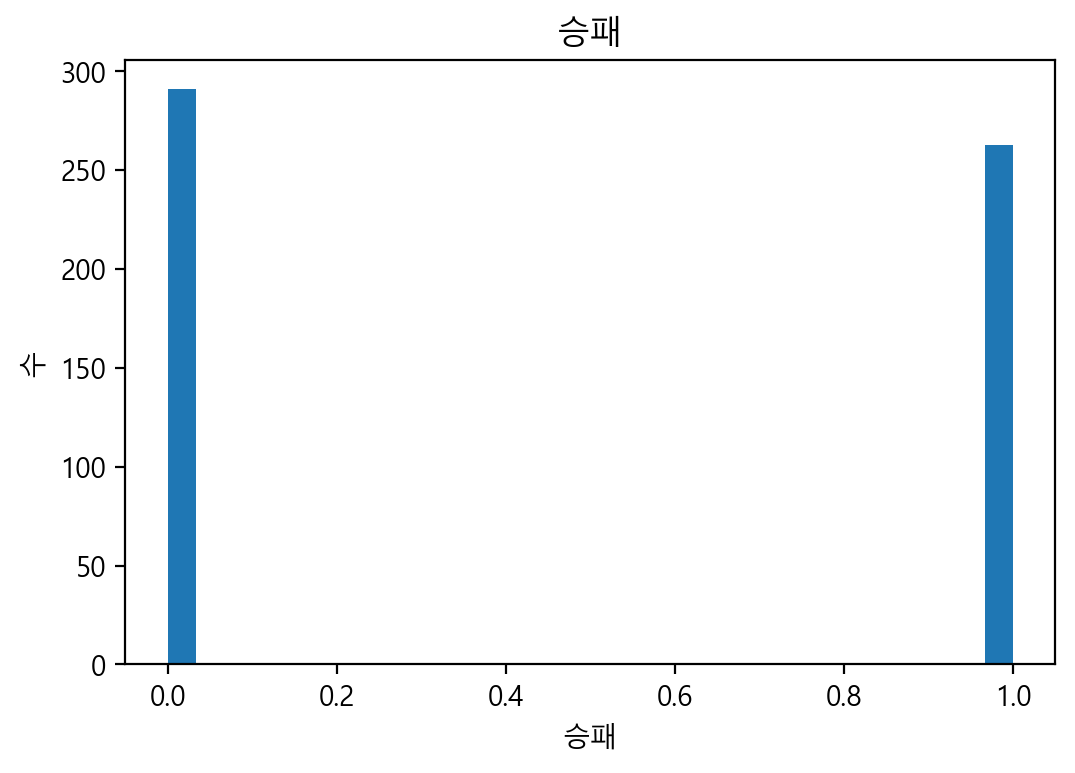

In [4]:
plt.figure(dpi=200)
plt.title("승패")
plt.xlabel('승패')
plt.ylabel('수')
plt.hist(df_1['승패'], bins=30)
plt.show()

In [5]:
# 편차를 줄이기 위해 정규화 과정 진행
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

# 정규화 과정 진행
df_2 = sc.fit_transform(df_1)

# 데이터 
df_sc = pd.DataFrame(df_2, columns = df_1.columns)
df_sc

,승패,AVG_K,OPS_K,HR/AB_K,SO/AB_K,ERA_K,WHIP_K,SO/IP_K,AVG_R,OPS_R,HR/AB_R,SO/AB_R,ERA_R,WHIP_R,SO/IP_R
0,0.0,0.628842,0.460377,0.000000,0.428884,0.233863,0.373737,0.533293,0.561576,0.585232,0.124615,0.412548,0.209096,0.421233,0.474680
1,1.0,0.810875,0.796226,0.616766,0.391685,0.046773,0.188552,0.466707,0.352217,0.319717,0.046154,0.410646,0.823314,0.702055,0.542404
2,1.0,0.761229,1.000000,1.000000,0.551422,0.000000,0.225589,0.266947,0.293103,0.248233,0.000000,0.247148,1.000000,0.873288,0.694936
3,0.0,0.210402,0.233962,0.000000,0.284464,0.280636,0.525253,0.400120,0.714286,0.540456,0.040000,0.290875,0.000000,0.154110,0.271507
4,1.0,0.773050,0.687547,0.365269,0.407002,0.000000,0.262626,0.533293,0.093596,0.183818,0.000000,0.560837,0.411918,0.616438,0.466138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,0.0,0.300236,0.182642,0.000000,0.671772,0.158092,0.390572,0.683263,0.465517,0.439906,0.049231,0.564639,0.052274,0.191781,0.745577
550,1.0,0.517730,0.414340,0.000000,0.380744,0.093545,0.114478,0.266947,0.226601,0.246661,0.049231,0.256654,0.156822,0.421233,0.406955
551,1.0,0.286052,0.294340,0.185629,0.422319,0.140318,0.373737,0.333533,0.463054,0.483896,0.087692,0.275665,0.261370,0.267123,0.406955
552,0.0,0.517730,0.501132,0.173653,0.630197,0.374181,0.636364,0.199760,0.610837,0.592302,0.075385,0.136882,0.261370,0.534247,0.677852


In [6]:
# r- square
df_test = df_sc.drop(['승패'], axis=1)
lm = sm.OLS(df_sc['승패'], df_test)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     승패   R-squared (uncentered):                   0.789
Model:                            OLS   Adj. R-squared (uncentered):              0.783
Method:                 Least Squares   F-statistic:                              144.0
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                   6.64e-172
Time:                        10:10:08   Log-Likelihood:                         -149.02
No. Observations:                 554   AIC:                                      326.0
Df Residuals:                     540   BIC:                                      386.5
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AVG_K         -0.2548      0.264     -0.965      0.335      -0.774       0.264
OPS_K          1.0005      0.438      2.285      0.023       0.141       1.860
HR/AB_K       -0.2938      0.174     -1.686      0.092      -0.636       0.049
SO/AB_K        0.4001      0.476      0.841      0.401      -0.535       1.335
ERA_K         -1.1524      0.153     -7.541      0.000      -1.453      -0.852
WHIP_K         0.0223      0.178      0.125      0.900      -0.328       0.372
SO/IP_K       -1.4213      0.368     -3.864      0.000      -2.144      -0.699
AVG_R          0.2746      0.195      1.410      0.159      -0.108       0.657
OPS_R         -0.1425      0.255     -0.558      0.577      -0.644       0.359
HR/AB_R       -0.2079      0.305     -0.681      0.496      -0.807       0.391
SO/AB_R        2.1087      0.437      4.821      0.000       1.249       2.968
ERA_R          0.9090      0.151      6.028      0.000       0.613       1.205
WHIP_R         0.0949      0.215      0.441      0.660      -0.328       0.518
SO/IP_R       -0.3321      0.453     -0.734      0.463      -1.221       0.557
==============================================================================
Omnibus:                       24.543   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.707
Skew:                           0.029   Prob(JB):                      0.00473
Kurtosis:                       2.321   Cond. No.                         74.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
def vif(x):
    # vif 10 초과시 drop을 위한 임계값 설정
    thresh = 10
    # Filter method로 feature selection 진행 후 최종 도출 될 데이터 프레임 형성
    output = pd.DataFrame()
    # 데이터의 컬럼 개수 설정
    k = x.shape[1]
    # VIF 측정
    vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    for i in range(1,k):
        print(f'{i}번째 VIF 측정')
        # VIF 최대 값 선정
        a = np.argmax(vif)
        print(f'Max VIF feature & value : {x.columns[a]}, {vif[a]}')
        # VIF 최대 값이 임계치를 넘지 않는 경우 break
        if (vif[a] <= thresh):
            print('\n')
            for q in range(output.shape[1]):
                print(f'{output.columns[q]}의 vif는 {np.round(vif[q],2)}입니다.')
            break
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        if (i == 1):
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 이후 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        elif (i > 1):
            output = output.drop(output.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)
vif(df_sc)

1번째 VIF 측정
Max VIF feature & value : OPS_K, 212.4602117021559
2번째 VIF 측정
Max VIF feature & value : HR/AB_K, 175.1352849146165
3번째 VIF 측정
Max VIF feature & value : ERA_K, 139.68683823575674
4번째 VIF 측정
Max VIF feature & value : WHIP_K, 91.47837642042252
5번째 VIF 측정
Max VIF feature & value : SO/AB_K, 35.37218570150683
6번째 VIF 측정
Max VIF feature & value : AVG_R, 31.190494251759223
7번째 VIF 측정
Max VIF feature & value : AVG_K, 14.018788770160459
8번째 VIF 측정
Max VIF feature & value : HR/AB_K, 11.472960626722791
9번째 VIF 측정
Max VIF feature & value : ERA_K, 5.45852783033772


승패의 vif는 4.2입니다.
HR/AB_K의 vif는 2.35입니다.
ERA_K의 vif는 3.93입니다.
HR/AB_R의 vif는 1.71입니다.
SO/AB_R의 vif는 4.46입니다.
ERA_R의 vif는 5.46입니다.
SO/IP_R의 vif는 4.52입니다.


,승패,HR/AB_K,ERA_K,HR/AB_R,SO/AB_R,ERA_R,SO/IP_R
0,0.0,0.000000,0.233863,0.124615,0.412548,0.209096,0.474680
1,1.0,0.616766,0.046773,0.046154,0.410646,0.823314,0.542404
2,1.0,1.000000,0.000000,0.000000,0.247148,1.000000,0.694936
3,0.0,0.000000,0.280636,0.040000,0.290875,0.000000,0.271507
4,1.0,0.365269,0.000000,0.000000,0.560837,0.411918,0.466138
...,...,...,...,...,...,...,...
549,0.0,0.000000,0.158092,0.049231,0.564639,0.052274,0.745577
550,1.0,0.000000,0.093545,0.049231,0.256654,0.156822,0.406955
551,1.0,0.185629,0.140318,0.087692,0.275665,0.261370,0.406955
552,0.0,0.173653,0.374181,0.075385,0.136882,0.261370,0.677852


In [10]:
# r- square + 최적의 vif
# data 쪼개기

df_2 = df_sc.loc[:, ['승패', 'HR/AB_K', 'SO/AB_K', 'ERA_K', 'HR/AB_R', 'SO/AB_R', 'ERA_R']]
df_2

,승패,HR/AB_K,SO/AB_K,ERA_K,HR/AB_R,SO/AB_R,ERA_R
0,0.0,0.000000,0.428884,0.233863,0.124615,0.412548,0.209096
1,1.0,0.616766,0.391685,0.046773,0.046154,0.410646,0.823314
2,1.0,1.000000,0.551422,0.000000,0.000000,0.247148,1.000000
3,0.0,0.000000,0.284464,0.280636,0.040000,0.290875,0.000000
4,1.0,0.365269,0.407002,0.000000,0.000000,0.560837,0.411918
...,...,...,...,...,...,...,...
549,0.0,0.000000,0.671772,0.158092,0.049231,0.564639,0.052274
550,1.0,0.000000,0.380744,0.093545,0.049231,0.256654,0.156822
551,1.0,0.185629,0.422319,0.140318,0.087692,0.275665,0.261370
552,0.0,0.173653,0.630197,0.374181,0.075385,0.136882,0.261370


In [11]:
df_test2 = df_2.drop(['승패'], axis=1)
lm = sm.OLS(df_2['승패'], df_test2)
results = lm.fit()
results.summary()

# but.. 특징들을 다 사용하는 것이 더 정확한 측정방법이 아닐까 라는 생각이 든다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     승패   R-squared (uncentered):                   0.762
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                              293.1
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                   2.01e-167
Time:                        10:11:07   Log-Likelihood:                         -181.57
No. Observations:                 554   AIC:                                      375.1
Df Residuals:                     548   BIC:                                      401.1
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HR/AB_K       -0.0717      0.104     -0.686      0.493      -0.277       0.134
SO/AB_K        0.2862      0.075      3.831      0.000       0.139       0.433
ERA_K         -1.0977      0.085    -12.986      0.000      -1.264      -0.932
HR/AB_R       -0.0349      0.254     -0.137      0.891      -0.535       0.465
SO/AB_R        0.7118      0.076      9.319      0.000       0.562       0.862
ERA_R          1.5636      0.089     17.665      0.000       1.390       1.737
==============================================================================
Omnibus:                       16.027   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.126
Skew:                           0.005   Prob(JB):                       0.0172
Kurtosis:                       2.407   Cond. No.                         11.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='승패', ylabel='HR/AB_K'>

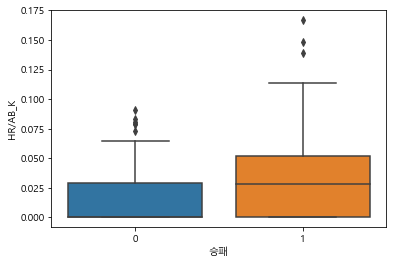

In [9]:
sns.boxplot(x=df_2['승패'], y=df_2['HR/AB_K'], data=df_2)